<a href="https://colab.research.google.com/github/Sourabh7k-Insights/Walmart_Project/blob/main/Walmart_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

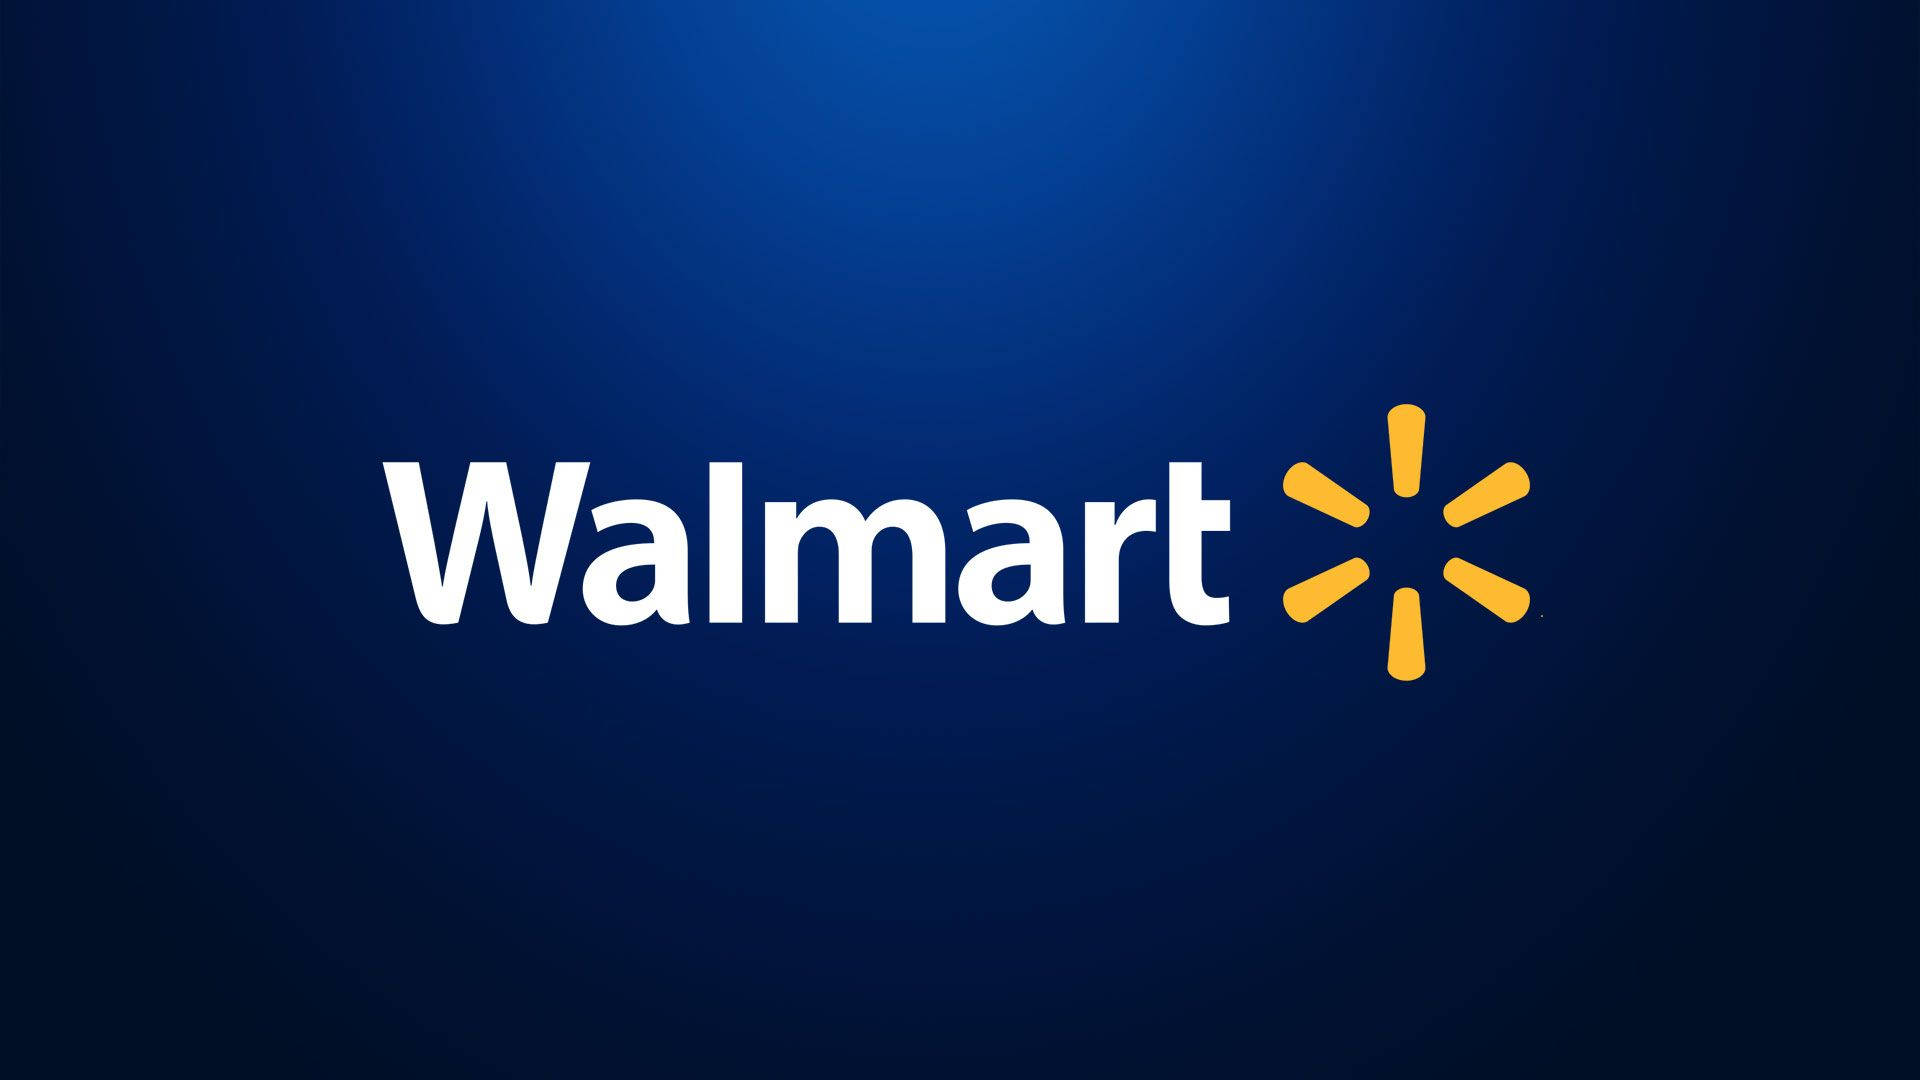

In [1]:
# @title Walmart  {"display-mode":"code"}
from IPython.display import Image

# Display the uploaded image
Image(filename='/content/sample_data/walmart.jpg',width=1100, height=700)

###About Walmart

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


###Business Problem

The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men?



##Importing Walmart Dataset & Basic Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
df=pd.read_csv('/content/sample_data/walmart_data.csv')
df.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871


In [4]:
df.shape

(550068, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [7]:
categorical_cols = ['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category']
for col in categorical_cols:
    df[col] = df[col].astype('category')
# df.head()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype   
---  ------                      --------------   -----   
 0   User_ID                     550068 non-null  int64   
 1   Product_ID                  550068 non-null  object  
 2   Gender                      550068 non-null  category
 3   Age                         550068 non-null  category
 4   Occupation                  550068 non-null  category
 5   City_Category               550068 non-null  category
 6   Stay_In_Current_City_Years  550068 non-null  category
 7   Marital_Status              550068 non-null  category
 8   Product_Category            550068 non-null  category
 9   Purchase                    550068 non-null  int64   
dtypes: category(7), int64(2), object(1)
memory usage: 16.3+ MB


###Outliers Detection & Null values

In [9]:
df.isnull().sum()

,0
User_ID,0
Product_ID,0
Gender,0
Age,0
Occupation,0
City_Category,0
Stay_In_Current_City_Years,0
Marital_Status,0
Product_Category,0
Purchase,0


In [10]:
df["Purchase"].describe()

,Purchase
count,550068.000000
mean,9263.968713
std,5023.065394
min,12.000000
25%,5823.000000
50%,8047.000000
75%,12054.000000
max,23961.000000


###Average amount spend by Users in Walmart

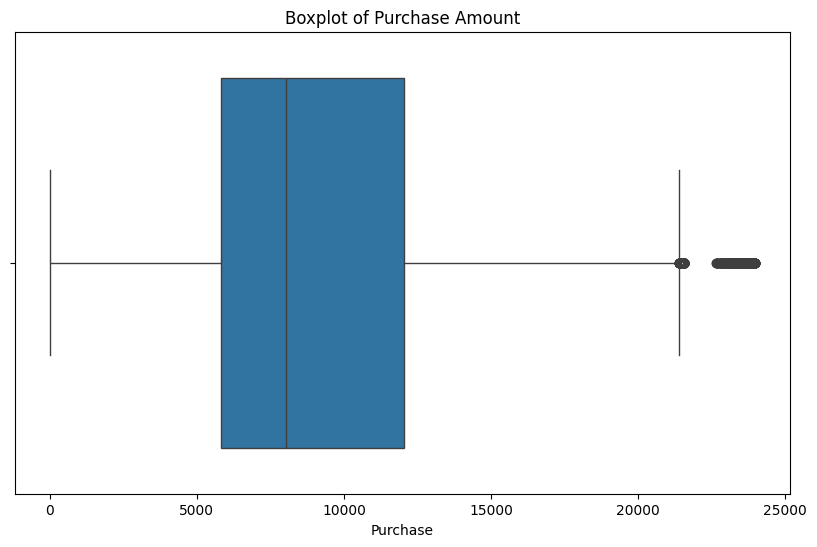

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Purchase')
plt.title('Boxplot of Purchase Amount')
plt.show()

###Product Purchases by Different Age Groups

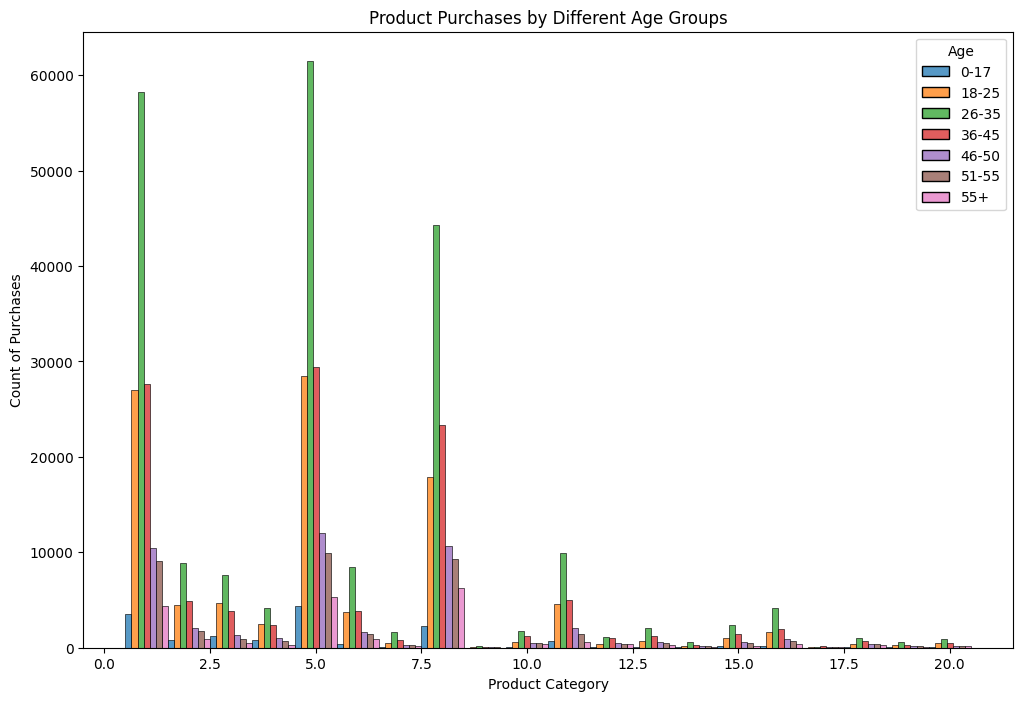

In [12]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x='Product_Category', hue='Age', multiple="dodge", kde=False)
plt.title("Product Purchases by Different Age Groups")
plt.xlabel("Product Category")
plt.ylabel("Count of Purchases")
plt.show()

###Purchase amount by age and Marital Status

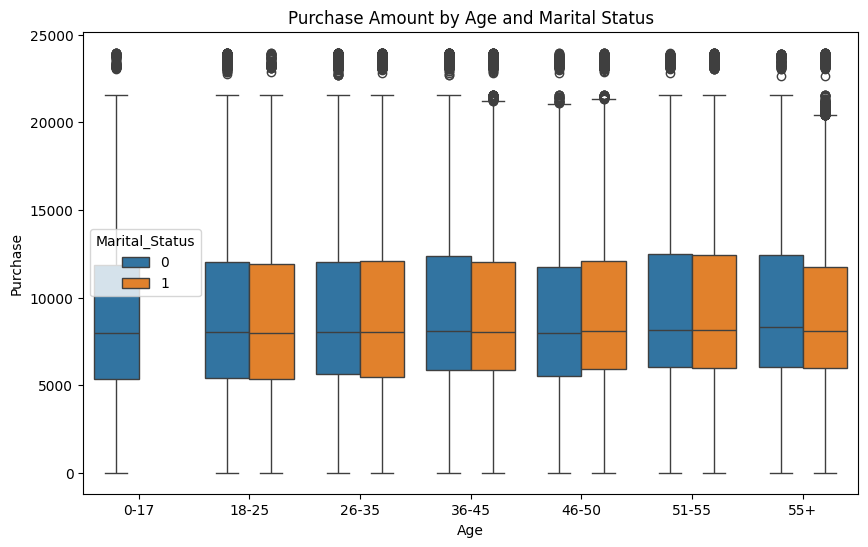

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Age', y='Purchase', hue='Marital_Status')
plt.title('Purchase Amount by Age and Marital Status')
plt.show()

##Preferred product categories for different genders

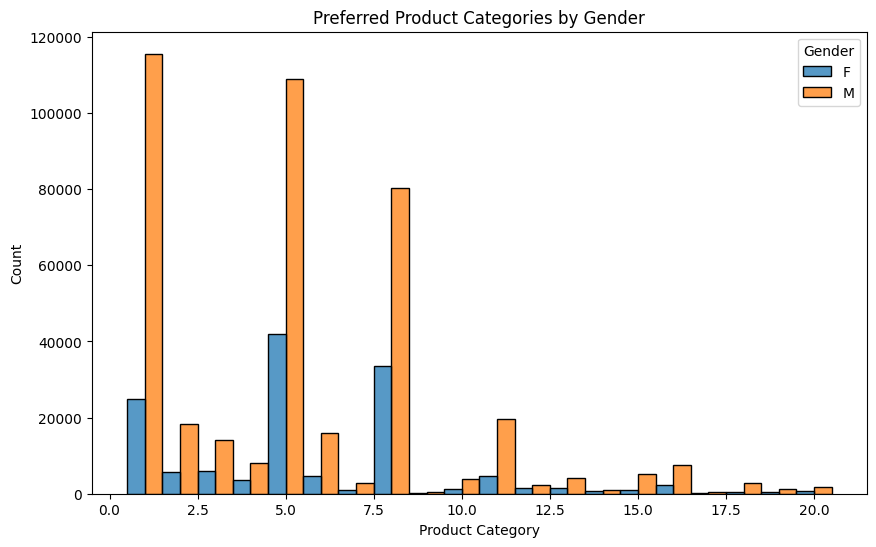

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Product_Category', hue='Gender', multiple='dodge')
plt.title('Preferred Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.show()

##Impact of Gender on Spending amount

In [15]:
male_data = df[df['Gender'] == 'M']['Purchase']
female_data = df[df['Gender'] == 'F']['Purchase']
# print(male_data)
# print(female_data)

# Male
male_sample_mean = np.mean(male_data)  # Sample mean
male_sample_std = np.std(male_data, ddof=1)  # Sample standard deviation
male_sample_size = len(male_data)  # Sample size
male_standard_error = male_sample_std / np.sqrt(male_sample_size)  # Standard error

# Z-value for 95% confidence interval (from normal distribution)
z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)

# Margin of error
male_margin_of_error = z_value * male_standard_error

# Confidence interval for males
male_lower_bound = male_sample_mean - male_margin_of_error
male_upper_bound = male_sample_mean + male_margin_of_error

print("Male:")
print("Sample Mean:", male_sample_mean)
print("Sample Standard Deviation:", male_sample_std)
print("Sample Size:", male_sample_size)
print("Standard Error:", male_standard_error)
print("95% Confidence Interval: ({:.2f}, {:.2f})".format(male_lower_bound, male_upper_bound))

print('--'*50)
# Female
female_sample_mean = np.mean(female_data)  # Sample mean
female_sample_std = np.std(female_data, ddof=1)  # Sample standard deviation
female_sample_size = len(female_data)  # Sample size
female_standard_error = female_sample_std / np.sqrt(female_sample_size)  # Standard error

# Z-value for 95% confidence interval
z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)

# Margin of error
female_margin_of_error = z_value * female_standard_error

# Confidence interval for males
female_lower_bound = female_sample_mean - female_margin_of_error
female_upper_bound = female_sample_mean + female_margin_of_error

print("Female:")
print("Sample Mean:", female_sample_mean)
print("Sample Standard Deviation:", female_sample_std)
print("Sample Size:", female_sample_size)
print("Standard Error:", female_standard_error)
print("95% Confidence Interval: ({:.2f}, {:.2f})".format(female_lower_bound, female_upper_bound))

Male:
Sample Mean: 9437.526040472265
Sample Standard Deviation: 5092.186209777949
Sample Size: 414259
Standard Error: 7.91167247562093
95% Confidence Interval: (9422.02, 9453.03)
----------------------------------------------------------------------------------------------------
Female:
Sample Mean: 8734.565765155476
Sample Standard Deviation: 4767.233289291444
Sample Size: 135809
Standard Error: 12.936063220950688
95% Confidence Interval: (8709.21, 8759.92)


In [16]:
sample_sizes = [300, 3000, 30000]


def calculate_confidence_interval(data, sample_size):

    sample_data = data.sample(n=sample_size, random_state=444)

    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    standard_error = sample_std / np.sqrt(sample_size)

    z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)

    margin_of_error = z_value * standard_error

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return sample_mean, sample_std, standard_error, lower_bound, upper_bound, margin_of_error

# print(male_data)
# print(female_data)

# Iterate over sample sizes
for sample_size in sample_sizes:
    print(f"Sample Size: {sample_size}")

    # Male data analysis
    male_sample_mean, male_sample_std, male_standard_error, male_lower_bound, male_upper_bound, male_margin_of_error = calculate_confidence_interval(male_data, sample_size)
    print(f"Male: Mean = {male_sample_mean:.2f}, Std Dev = {male_sample_std:.2f}, SE = {male_standard_error:.2f}, CI = ({male_lower_bound:.2f}, {male_upper_bound:.2f})")

    # Female data analysis
    female_sample_mean, female_sample_std, female_standard_error, female_lower_bound, female_upper_bound, female_margin_of_error = calculate_confidence_interval(female_data, sample_size)
    print(f"Female: Mean = {female_sample_mean:.2f}, Std Dev = {female_sample_std:.2f}, SE = {female_standard_error:.2f}, CI = ({female_lower_bound:.2f}, {female_upper_bound:.2f})")

    print('-' * 50)


Sample Size: 300
Male: Mean = 9065.15, Std Dev = 5015.92, SE = 289.59, CI = (8497.55, 9632.74)
Female: Mean = 8708.57, Std Dev = 4734.46, SE = 273.34, CI = (8172.83, 9244.31)
--------------------------------------------------
Sample Size: 3000
Male: Mean = 9292.22, Std Dev = 5043.87, SE = 92.09, CI = (9111.73, 9472.71)
Female: Mean = 8779.91, Std Dev = 4815.55, SE = 87.92, CI = (8607.59, 8952.23)
--------------------------------------------------
Sample Size: 30000
Male: Mean = 9427.59, Std Dev = 5081.22, SE = 29.34, CI = (9370.09, 9485.09)
Female: Mean = 8711.02, Std Dev = 4775.67, SE = 27.57, CI = (8656.98, 8765.07)
--------------------------------------------------


## 1.Are women spending more money per transaction than men? Why or Why not?

Male Spending: The average spending per transaction for males is approximately
9437.53 with a 95% confidence interval of

(9422.02,9453.03).

Female Spending: The average spending per transaction for females is approximately
8734.57, with a 95% confidence interval of

(8709.21,8759.92).

Women are not spending more money per transaction than men.

##2.Confidence intervals and distribution of the mean of the expenses by female and male customers ?
As per both the sample means and their confidence intervals:

The average spending per transaction for males is higher than that for females.

There is no overlap in the confidence intervals for male and female spending.The non-overlapping intervals highlight the statistically significant difference in average spending.



# Confidence Intervals (CI) for Spending in Males and Females

*   **For Male**, the confidence interval for the entire dataset (Sample Size: 414,
259) is narrower (CI: (9422.02, 9453.03)) compared to the smaller sample sizes.
*  **For Female**, the confidence interval for the entire dataset (Sample Size: 135,809) is narrower (CI: (8709.21, 8759.92)) compared to the smaller sample sizes.



*   As the sample size increases from **300 to 30000**, the confidence intervals for both genders get narrower, indicating greater precision in estimating the population mean.Larger sample sizes result in a more **precise estimate**, but the intervals still contain the true mean, which is why they overlap.

*   Sample size affects the shape of the distribution of sample means: as **sample size increases**, the distribution **becomes narrower**, indicating more precision.

*   The confidence interval for males is entirely above the confidence interval for females. This means the average spending for males is statistically significantly higher than for females.







##Impact of Marital-Status on Spending amount

In [17]:
marital_status_groups = df['Marital_Status'].unique()

for status in marital_status_groups:
    marital_status_data = df[df['Marital_Status'] == status]['Purchase']

    sample_mean = np.mean(marital_status_data)
    sample_std = np.std(marital_status_data, ddof=1)
    sample_size = len(marital_status_data)
    standard_error = sample_std / np.sqrt(sample_size)

    z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)

    margin_of_error = z_value * standard_error

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    print(f"Marital Status: {status}")
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Sample Standard Deviation: {sample_std:.2f}")
    print(f"Sample Size: {sample_size}")
    print(f"Standard Error: {standard_error:.2f}")
    print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")
    print('-'*50)


Marital Status: 0
Sample Mean: 9265.91
Sample Standard Deviation: 5027.35
Sample Size: 324731
Standard Error: 8.82
95% Confidence Interval: (9248.62, 9283.20)
--------------------------------------------------
Marital Status: 1
Sample Mean: 9261.17
Sample Standard Deviation: 5016.90
Sample Size: 225337
Standard Error: 10.57
95% Confidence Interval: (9240.46, 9281.89)
--------------------------------------------------


In [18]:
sample_sizes = [300, 3000, 30000]

for status in marital_status_groups:
    marital_status_data = df[df['Marital_Status'] == status]['Purchase']

    print(f"\nMarital Status: {status}")

    for size in sample_sizes:
        sample = marital_status_data.sample(n=size, random_state=444)

        sample_mean = np.mean(sample)
        sample_std = np.std(sample, ddof=1)
        standard_error = sample_std / np.sqrt(size)

        margin_of_error = z_value * standard_error

        lower_bound = sample_mean - margin_of_error
        upper_bound = sample_mean + margin_of_error

        print(f"\nSample Size: {size}")
        print(f"Sample Mean: {sample_mean:.2f}")
        print(f"Sample Standard Deviation: {sample_std:.2f}")
        print(f"Standard Error: {standard_error:.2f}")
        print(f"95% Confidence Interval: ({lower_bound:.2f}, {upper_bound:.2f})")



Marital Status: 0

Sample Size: 300
Sample Mean: 9319.74
Sample Standard Deviation: 5102.36
Standard Error: 294.58
95% Confidence Interval: (8742.36, 9897.11)

Sample Size: 3000
Sample Mean: 9221.64
Sample Standard Deviation: 4952.34
Standard Error: 90.42
95% Confidence Interval: (9044.43, 9398.85)

Sample Size: 30000
Sample Mean: 9281.43
Sample Standard Deviation: 5007.00
Standard Error: 28.91
95% Confidence Interval: (9224.77, 9338.08)

Marital Status: 1

Sample Size: 300
Sample Mean: 9551.91
Sample Standard Deviation: 4942.23
Standard Error: 285.34
95% Confidence Interval: (8992.65, 10111.16)

Sample Size: 3000
Sample Mean: 9299.55
Sample Standard Deviation: 5057.21
Standard Error: 92.33
95% Confidence Interval: (9118.59, 9480.52)

Sample Size: 30000
Sample Mean: 9247.04
Sample Standard Deviation: 5022.65
Standard Error: 29.00
95% Confidence Interval: (9190.20, 9303.87)


# **Confidence Intervals (CI) for Married vs Unmarried**


Marital Status:0(Unmarried) 95% Confidence Interval: (9248.62, 9283.20)

Marital Status:1(married) 95% Confidence Interval: (9240.46, 9281.89)



*   Confidence Interval Width Comparison (Entire Dataset): The confidence intervals for both unmarried (0) and married (1) groups are narrow.larger sample sizes result in narrower confidence intervals.
*   As sample sizes increase (from 300 to 3000 to 30000)
This narrowing happens because the standard error decreases with larger sample sizes, reducing the margin of error and thus tightening the confidence interval.

*   This overlap indicates that the average spending between married and unmarried customers is very similar, suggesting no statistically significant difference between their mean expenditures in this dataset.
*  Larger sample sizes yield distributions of sample means that are more tightly concentrated around the population mean & Smaller sample sizes may show more variability, resulting in a less precise approximation of the true mean distribution.



## Impact of Age-Distribuition on Spending amount

In [19]:
df['Age'].unique()

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']
Categories (7, object): ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

In [20]:
import scipy.stats as stats

def calculate_ci(sample_data):
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    sample_size = len(sample_data)
    standard_error = sample_std / np.sqrt(sample_size)

    z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)

    margin_of_error = z_value * standard_error

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return sample_mean, sample_std, sample_size, lower_bound, upper_bound

age_categories = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for age_group in age_categories:
    age_group_data = df[df['Age'] == age_group]['Purchase']
    actual_sample_size = len(age_group_data)

    print(f"Age Group: {age_group}")

    ci_full = calculate_ci(age_group_data)
    print(f"Sample Size: {actual_sample_size} (Full Dataset) -> Mean = {ci_full[0]}, CI = ({ci_full[3]}, {ci_full[4]})")

    print('-' * 50)


Age Group: 0-17
Sample Size: 15102 (Full Dataset) -> Mean = 8933.464640444974, CI = (8851.947970542686, 9014.981310347262)
--------------------------------------------------
Age Group: 18-25
Sample Size: 99660 (Full Dataset) -> Mean = 9169.663606261289, CI = (9138.407948753442, 9200.919263769136)
--------------------------------------------------
Age Group: 26-35
Sample Size: 219587 (Full Dataset) -> Mean = 9252.690632869888, CI = (9231.73367640003, 9273.647589339746)
--------------------------------------------------
Age Group: 36-45
Sample Size: 110013 (Full Dataset) -> Mean = 9331.350694917874, CI = (9301.669410965314, 9361.031978870433)
--------------------------------------------------
Age Group: 46-50
Sample Size: 45701 (Full Dataset) -> Mean = 9208.625697468327, CI = (9163.085142648752, 9254.166252287903)
--------------------------------------------------
Age Group: 51-55
Sample Size: 38501 (Full Dataset) -> Mean = 9534.808030960236, CI = (9483.991472776577, 9585.624589143894)
-

In [21]:
import scipy.stats as stats

def calculate_ci(sample_data):
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)
    sample_size = len(sample_data)
    standard_error = sample_std / np.sqrt(sample_size)

    z_value = stats.norm.ppf(1 - (1 - 0.95) / 2)

    margin_of_error = z_value * standard_error

    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return sample_mean, sample_std, sample_size, lower_bound, upper_bound

age_categories = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

for age_group in age_categories:
    age_group_data = df[df['Age'] == age_group]['Purchase']

    print(f"Age Group: {age_group}")


    sample_300 = np.random.choice(age_group_data, 300, replace=False)
    sample_3000 = np.random.choice(age_group_data, 3000, replace=False)
    sample_30000 = np.random.choice(age_group_data, 30000, replace=True)

    ci_300 = calculate_ci(sample_300)
    ci_3000 = calculate_ci(sample_3000)
    ci_30000 = calculate_ci(sample_30000)

    print(f"Sample Size: 300 -> Mean = {ci_300[0]}, CI = ({ci_300[3]}, {ci_300[4]})")
    print(f"Sample Size: 3000 -> Mean = {ci_3000[0]}, CI = ({ci_3000[3]}, {ci_3000[4]})")
    print(f"Sample Size: 30000 -> Mean = {ci_30000[0]}, CI = ({ci_30000[3]}, {ci_30000[4]})")
    print('-' * 50)


Age Group: 0-17
Sample Size: 300 -> Mean = 8746.313333333334, CI = (8209.306237986126, 9283.320428680541)
Sample Size: 3000 -> Mean = 8854.203666666666, CI = (8671.06589916072, 9037.341434172613)
Sample Size: 30000 -> Mean = 8909.699433333333, CI = (8851.924814057254, 8967.474052609412)
--------------------------------------------------
Age Group: 18-25
Sample Size: 300 -> Mean = 8702.67, CI = (8192.684913275873, 9212.655086724128)
Sample Size: 3000 -> Mean = 9132.960333333333, CI = (8951.826560734464, 9314.094105932201)
Sample Size: 30000 -> Mean = 9167.244533333333, CI = (9110.188474562263, 9224.300592104402)
--------------------------------------------------
Age Group: 26-35
Sample Size: 300 -> Mean = 9025.703333333333, CI = (8443.425370040653, 9607.981296626012)
Sample Size: 3000 -> Mean = 9126.136333333334, CI = (8948.860935755854, 9303.411730910813)
Sample Size: 30000 -> Mean = 9229.0932, CI = (9172.50106557585, 9285.685334424148)
-------------------------------------------------

# **Confidence Intervals (CI) for Spending as per Age group**

**Highest Spending:** Age Group 51-55

Age Group 51-55 has the highest mean spending at 9534.81.

**Lowest Spending:** Age Group 0-17

Age Group 0-17 has the lowest mean spending at 8933.46.

*   As the sample size increases, the standard error decreases, leading to a narrower confidence interval. This is a consequence of the Central Limit Theorem (CLT),
*   The width of the confidence interval decreases as the sample size increases


*   for the age group 18-25, the confidence intervals for the sample sizes of 300, 3000, and 30000 overlap, but the intervals for 30000 are the narrowest, indicating greater precision in the estimate of the mean.
*   As the sample size increases, the sample means tend to form a normal distribution with less spread




##Recommnedations



1.   Gender-neutral campaigns are suitable for general promotions due to the overlapping confidence intervals in average spending between genders.
2.   Target Older Age Groups with Promotions
3.   Implement seasonal promotions, especially for age groups or genders that spend more during certain times of the year.
4.    Since some groups (like 0-17 or 36-45) spend lower amounts, Walmart should focus on offering value-for-money deals, such as discounts or bundles, to attract these price-conscious customers.




